<a href="https://colab.research.google.com/github/kamojaz/mma/blob/main/DOS_Exploration_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pycaret

In [ ]:
#!pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('MMM_Blender_data_2.xlsx', )
df.head()

,Date,Sales ($),TV_ads ($),online_ads ($),Print_ads ($),Price ($)
0,Jan-2008,6237000,181222.548442,12152.540107,24986.912760,135.0
1,Feb-2008,6115500,179104.353164,57353.376363,17574.385360,135.0
2,Mar-2008,10577250,222756.223235,146794.245435,16016.022899,135.0
3,Apr-2008,13473000,188266.818315,376459.468169,29689.694160,135.0
4,May-2008,6258525,210038.289741,21297.573231,17606.991440,136.5


In [ ]:
df.dtypes

Date               object
Sales ($)           int64
TV_ads ($)        float64
online_ads ($)    float64
Print_ads ($)     float64
Price ($)         float64
dtype: object

In [ ]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sales ($),TV_ads ($),online_ads ($),Print_ads ($),Price ($)
Sales ($),1.000000,0.257099,0.835495,0.175270,-0.445525
TV_ads ($),0.257099,1.000000,0.024491,-0.051552,-0.099772
online_ads ($),0.835495,0.024491,1.000000,0.002512,-0.057553
Print_ads ($),0.175270,-0.051552,0.002512,1.000000,-0.073863
Price ($),-0.445525,-0.099772,-0.057553,-0.073863,1.000000


In [ ]:
df['Sales ($)'].autocorr()

0.24698471482168666

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

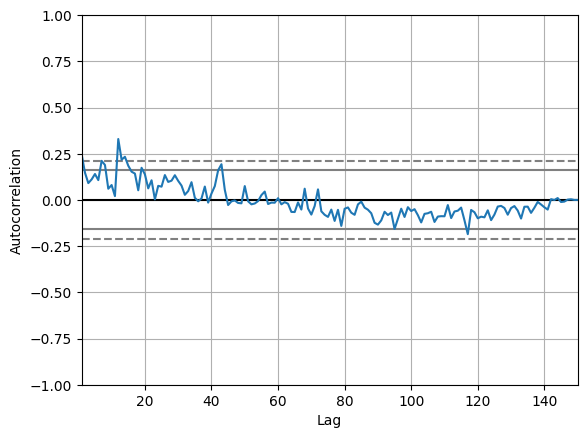

In [ ]:
pd.plotting.autocorrelation_plot(df['Sales ($)'])

<Axes: ylabel='Frequency'>

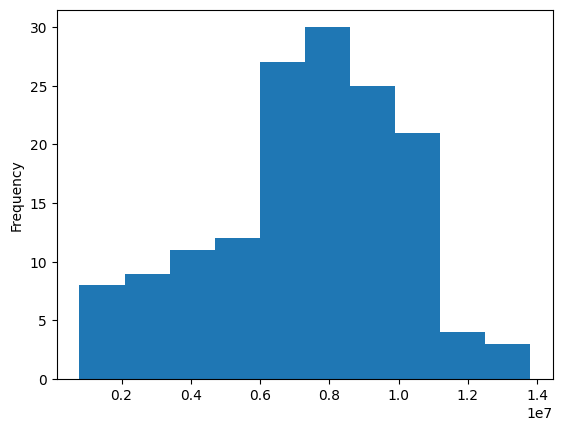

In [ ]:
df['Sales ($)'].plot.hist()

<Axes: ylabel='Frequency'>

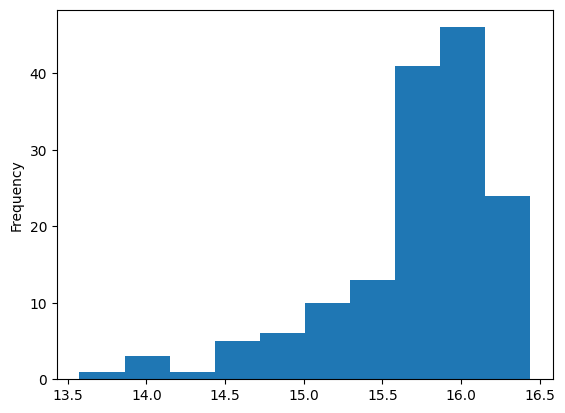

In [ ]:
np.log(df['Sales ($)']).plot.hist()

<Axes: ylabel='Frequency'>

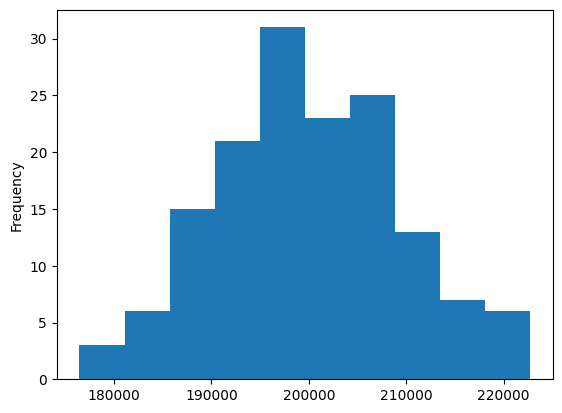

In [ ]:
df['TV_ads ($)'].plot.hist()

<Axes: ylabel='Frequency'>

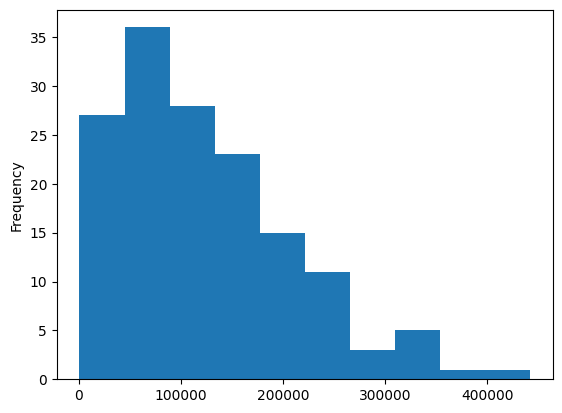

In [ ]:
df['online_ads ($)'].plot.hist()

<Axes: ylabel='Frequency'>

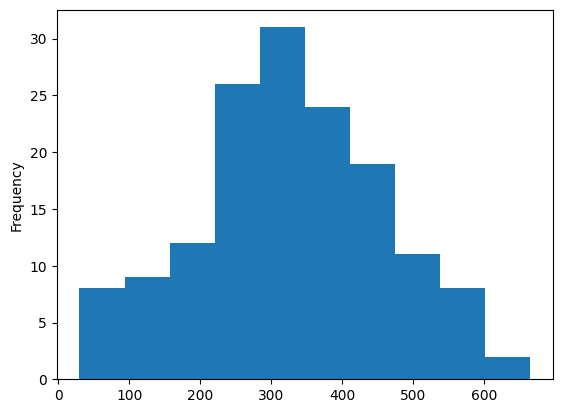

In [ ]:
np.sqrt(df['online_ads ($)']).plot.hist()

<Axes: ylabel='Frequency'>

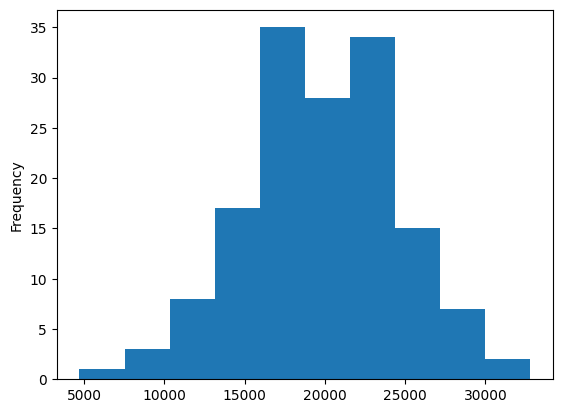

In [ ]:
df['Print_ads ($)'].plot.hist()

<Axes: ylabel='Frequency'>

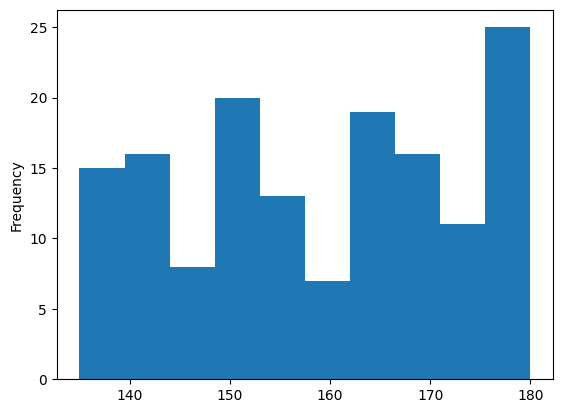

In [ ]:
df['Price ($)'].plot.hist()

<Axes: xlabel='Sales ($)', ylabel='Price ($)'>

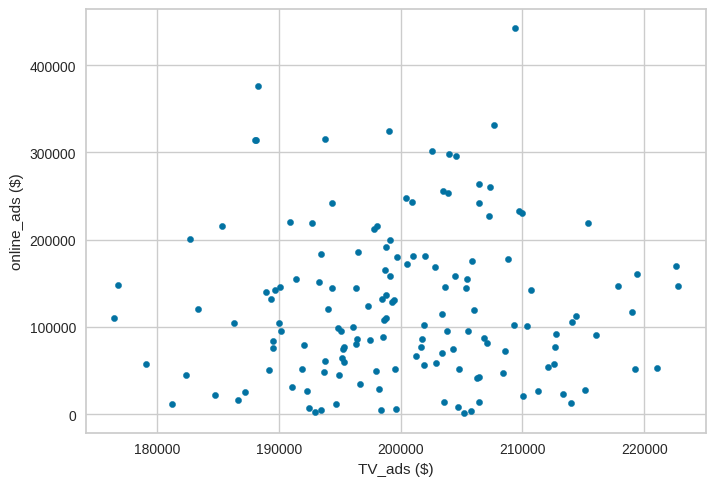

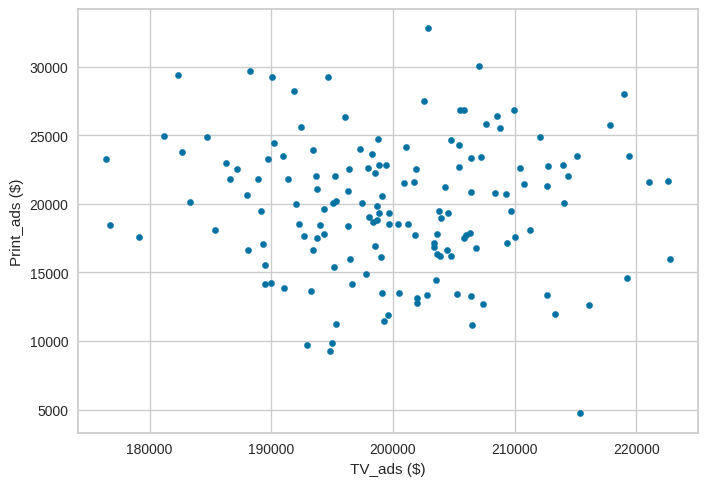

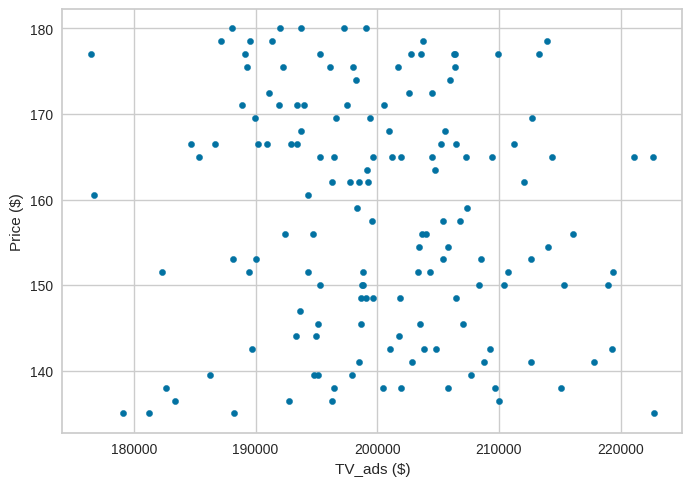

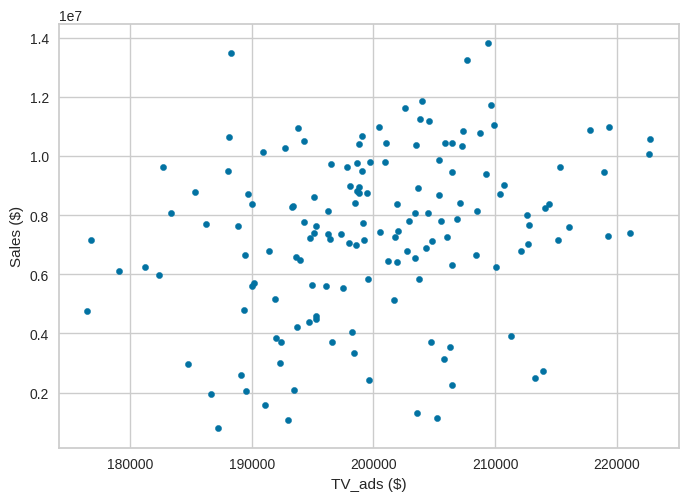

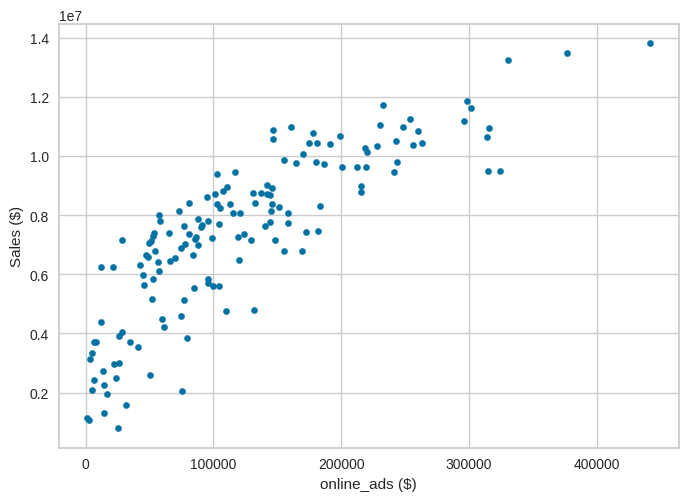

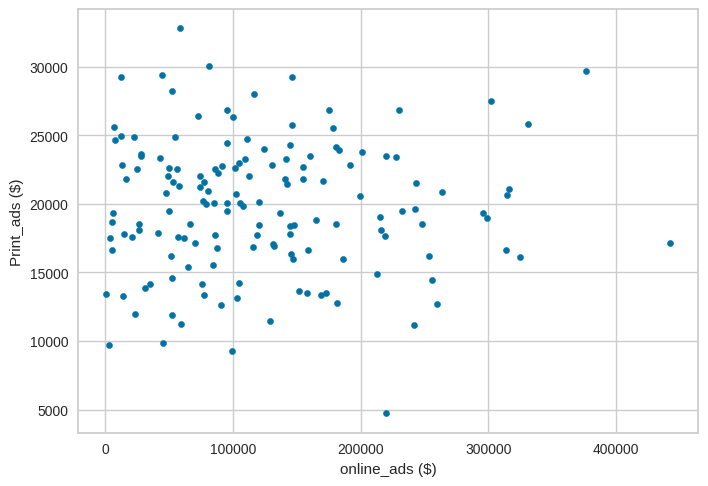

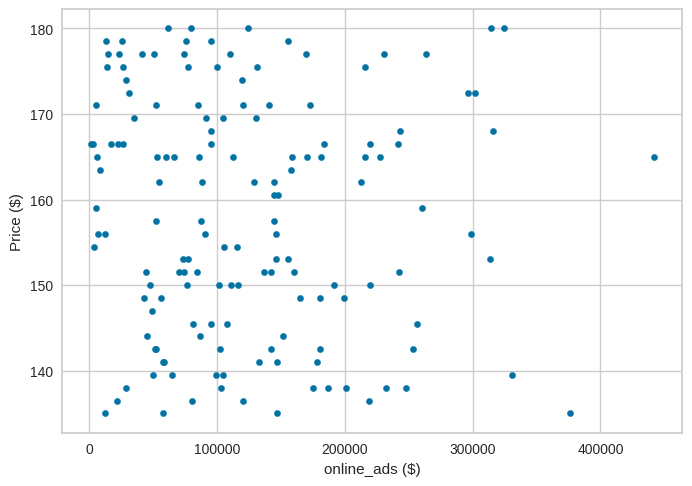

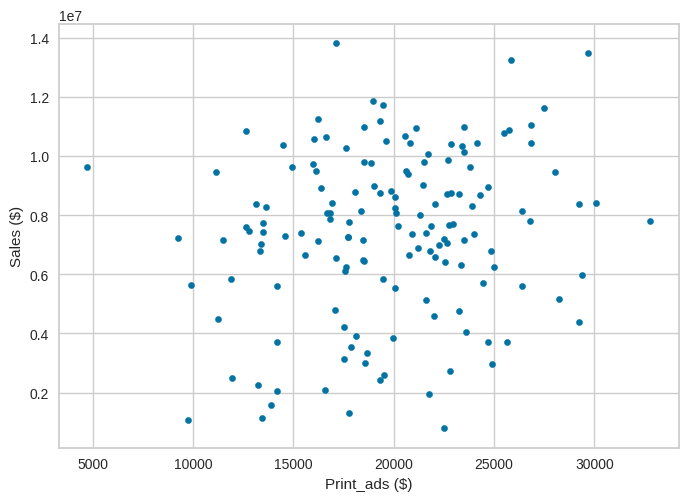

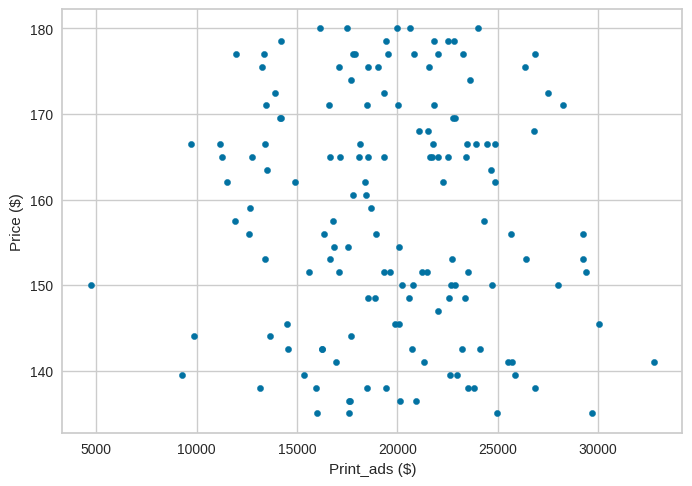

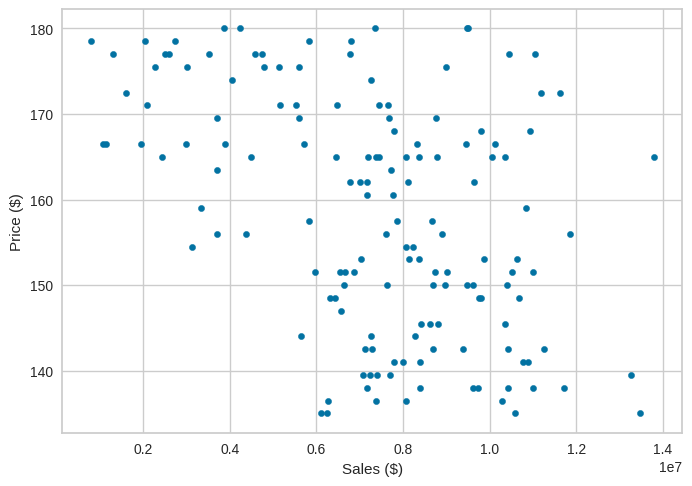

In [33]:
numeric_col = ['Sales ($)', 'TV_ads ($)', 'online_ads ($)', 'Print_ads ($)', 'Price ($)']

df.plot.scatter(x='TV_ads ($)',y='online_ads ($)')
df.plot.scatter(x='TV_ads ($)',y='Print_ads ($)')
df.plot.scatter(x='TV_ads ($)',y='Price ($)')
df.plot.scatter(x='TV_ads ($)',y='Sales ($)')
df.plot.scatter(x='online_ads ($)',y='Sales ($)')
df.plot.scatter(x='online_ads ($)',y='Print_ads ($)')
df.plot.scatter(x='online_ads ($)',y='Price ($)')
df.plot.scatter(x='Print_ads ($)',y='Sales ($)')
df.plot.scatter(x='Print_ads ($)',y='Price ($)')
df.plot.scatter(x='Sales ($)',y='Price ($)')


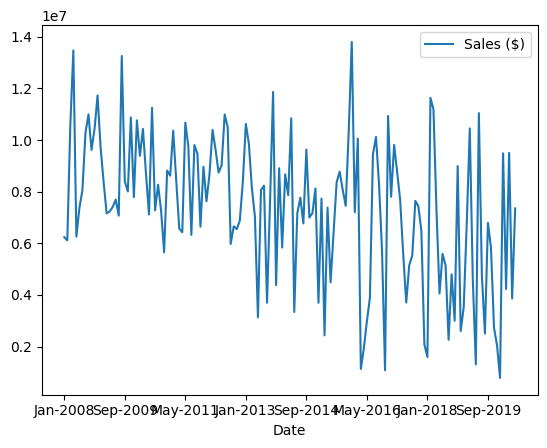

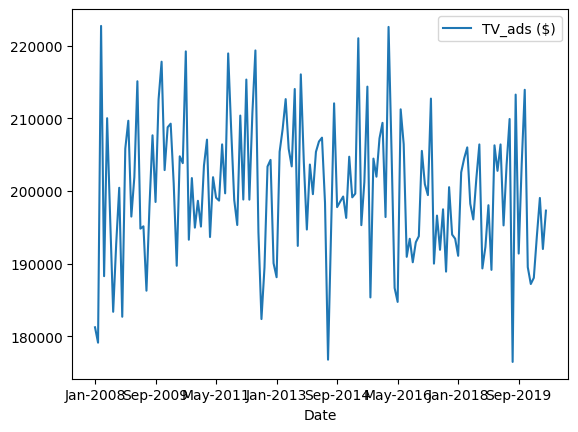

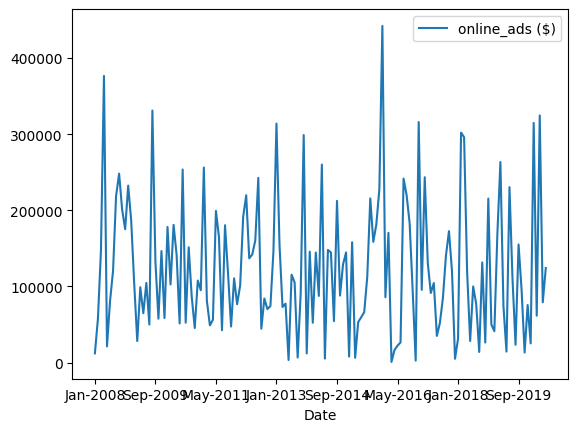

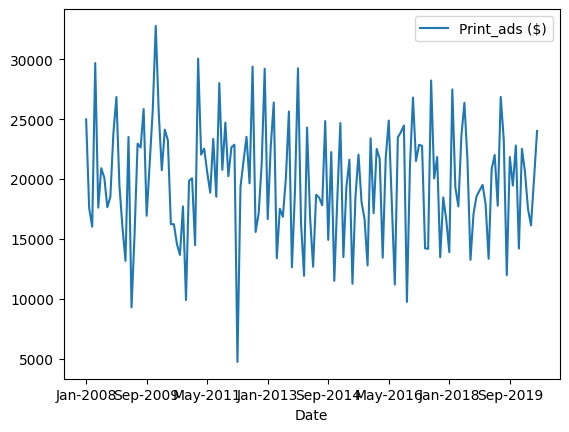

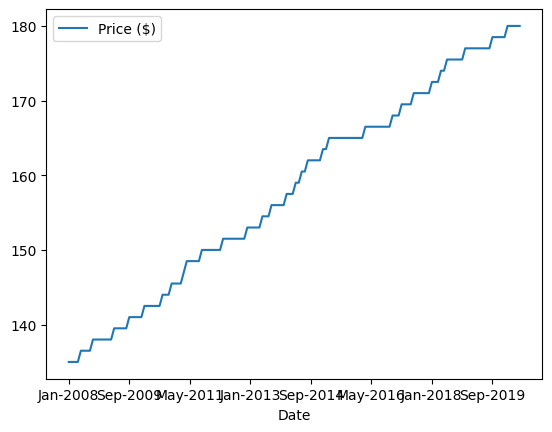

In [ ]:
numeric_col = ['Sales ($)', 'TV_ads ($)', 'online_ads ($)', 'Print_ads ($)', 'Price ($)']
for col in numeric_col:
  df.plot.line(x='Date',y=col)

In [ ]:
df['sqrt_online_ads'] = np.sqrt(df['online_ads ($)'])
df['total_advertising'] = df['TV_ads ($)'] + df['online_ads ($)'] + df['Print_ads ($)']
df['log_sales'] = np.log(df['Sales ($)'])
df['Date'] = pd.to_datetime(df['Date'])
#df['month'] = [i.month for i in df['Date']]
#df['year'] = [i.year for i in df['Date']]

df.head()

,Date,Sales ($),TV_ads ($),online_ads ($),Print_ads ($),Price ($),sqrt_online_ads,total_advertising,log_sales
0,2008-01-01,6237000,181222.548442,12152.540107,24986.912760,135.0,110.238560,218362.001308,15.646010
1,2008-02-01,6115500,179104.353164,57353.376363,17574.385360,135.0,239.485650,254032.114887,15.626337
2,2008-03-01,10577250,222756.223235,146794.245435,16016.022899,135.0,383.137371,385566.491569,16.174216
3,2008-04-01,13473000,188266.818315,376459.468169,29689.694160,135.0,613.562929,594415.980643,16.416198
4,2008-05-01,6258525,210038.289741,21297.573231,17606.991440,136.5,145.936881,248942.854412,15.649455


In [ ]:
model_df = df.copy()
model_df = model_df.drop(['Date', 'online_ads ($)', 'Sales ($)'], axis=1)
#model_df.drop(index=model_df.index[0], axis=0, inplace=True)

#model_df['month'] = model_df['month'].astype('category')
#model_df['year'] = model_df['year'].astype('category')
#model_df = pd.get_dummies(model_df, columns=['month','year'], drop_first=True)

model_df.head()

,TV_ads ($),Print_ads ($),Price ($),sqrt_online_ads,total_advertising,log_sales
0,181222.548442,24986.912760,135.0,110.238560,218362.001308,15.646010
1,179104.353164,17574.385360,135.0,239.485650,254032.114887,15.626337
2,222756.223235,16016.022899,135.0,383.137371,385566.491569,16.174216
3,188266.818315,29689.694160,135.0,613.562929,594415.980643,16.416198
4,210038.289741,17606.991440,136.5,145.936881,248942.854412,15.649455


In [ ]:
from pycaret.time_series import *
s = setup(model_df, target='log_sales', session_id = 123, fh=6, fold = 3)

,Description,Value
0,session_id,123
1,Target,log_sales
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(150, 6)"
5,Transformed data shape,"(150, 6)"
6,Transformed train set shape,"(144, 6)"
7,Transformed test set shape,"(6, 6)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.5876,0.5096,0.2179,0.2822,0.0144,0.0143,0.6948,0.5533
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.5947,0.5117,0.2206,0.2833,0.0146,0.0145,0.6932,0.3100
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.5948,0.5117,0.2206,0.2833,0.0146,0.0145,0.6932,0.3067
arima,ARIMA,0.6002,0.5260,0.2226,0.2908,0.0149,0.0148,0.7327,0.4400
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.6037,0.5070,0.2242,0.2807,0.0149,0.0147,0.6863,0.5367
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.6095,0.5562,0.2264,0.3081,0.0150,0.0149,0.6036,0.9533
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.6205,0.5320,0.2301,0.2946,0.0153,0.0152,0.6585,0.3133
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.6431,0.5540,0.2388,0.3068,0.0158,0.0157,0.6481,0.4667
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.6742,0.5488,0.2500,0.3037,0.0167,0.0165,0.6392,0.5467
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.6812,0.5512,0.2525,0.3050,0.0168,0.0167,0.6359,0.7967


Processing:   0%|          | 0/101 [00:00<?, ?it/s]

In [ ]:
from pycaret.regression import *
s = setup(model_df, target='log_sales', session_id = 123, fold = 3)

,Description,Value
0,Session id,123
1,Target,log_sales
2,Target type,Regression
3,Original data shape,"(150, 6)"
4,Transformed data shape,"(150, 6)"
5,Transformed train set shape,"(105, 6)"
6,Transformed test set shape,"(45, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.1275,0.0478,0.2046,0.8559,0.0130,0.0085,0.0767
ada,AdaBoost Regressor,0.1349,0.0482,0.2058,0.8528,0.0129,0.0089,0.1000
et,Extra Trees Regressor,0.1297,0.0535,0.2174,0.8368,0.0139,0.0086,0.1500
xgboost,Extreme Gradient Boosting,0.1428,0.0559,0.2237,0.8259,0.0142,0.0095,0.0533
ridge,Ridge Regression,0.1522,0.0566,0.2288,0.8137,0.0144,0.0100,0.0500
lr,Linear Regression,0.1522,0.0566,0.2288,0.8137,0.0144,0.0100,0.0600
br,Bayesian Ridge,0.1500,0.0568,0.2286,0.8135,0.0144,0.0099,0.0467
rf,Random Forest Regressor,0.1430,0.0591,0.2305,0.8131,0.0146,0.0095,0.3267
en,Elastic Net,0.1494,0.0603,0.2340,0.8047,0.0147,0.0099,0.0467
lar,Least Angle Regression,0.1531,0.0560,0.2303,0.8032,0.0145,0.0100,0.0433


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
ada = create_model('ada')
et = create_model('et')
xgboost = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1072,0.0305,0.1747,0.8704,0.0110,0.0070
1,0.1844,0.0626,0.2503,0.7620,0.0155,0.0119
2,0.1710,0.0859,0.2931,0.8032,0.0190,0.0116
Mean,0.1542,0.0597,0.2393,0.8119,0.0151,0.0101
Std,0.0337,0.0227,0.0490,0.0447,0.0033,0.0022


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0802,0.0204,0.1427,0.9135,0.0091,0.0053
1,0.0999,0.0228,0.1511,0.9132,0.0094,0.0065
2,0.1471,0.0722,0.2687,0.8346,0.0174,0.0100
Mean,0.1091,0.0385,0.1875,0.8871,0.0120,0.0072
Std,0.0281,0.0239,0.0575,0.0371,0.0039,0.0020


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1438,0.0509,0.2257,0.7837,0.0141,0.0093
1,0.1591,0.0593,0.2436,0.7746,0.0152,0.0103
2,0.1475,0.0594,0.2437,0.8640,0.0158,0.0099
Mean,0.1501,0.0565,0.2376,0.8074,0.0150,0.0098
Std,0.0065,0.0040,0.0085,0.0402,0.0007,0.0004


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
evaluate_model(xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…